In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
current_dir = os.getcwd()

In [3]:
#Define the path to the data folder
data_dir = os.path.join(current_dir, "data")

# List of years to load data for
years = list(range(2015,2022))

# Create an empty dictionary to store the data
yearly_reports = {}

# Read the CSV files and store them in the dictionary
for year in years:
    yearly_report_path = os.path.join(data_dir, f"World Happiness Report {year}.csv")
    yearly_report = pd.read_csv(yearly_report_path)
    yearly_reports[year] = yearly_report

In [4]:
yearly_reports[2017].sample(20)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
90,Honduras,91,5.181,5.301583,5.060418,0.730573,1.143945,0.582569,0.348080,0.236189,0.073345,2.065811
34,Qatar,35,6.375,6.568477,6.181523,1.870766,1.274297,0.710098,0.604131,0.330474,0.439299,1.145464
124,Georgia,125,4.286,4.374934,4.197066,0.950613,0.570615,0.649547,0.309410,0.054009,0.251667,1.500138
144,Haiti,145,3.603,3.734715,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
11,Costa Rica,12,7.079,7.168112,6.989888,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,2.898639
91,Macedonia,92,5.175,5.272173,5.077828,1.064578,1.207893,0.644948,0.325906,0.253761,0.060278,1.617469
142,Benin,143,3.657,3.745784,3.568217,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631
46,Uzbekistan,47,5.971,6.065538,5.876463,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,1.816914
121,India,122,4.315,4.371522,4.258478,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227,1.519117


In [5]:
for year, df in yearly_reports.items():
    print(f"Information for {year}:")
    print(df.info())
    print()
    print("-"*30)

Information for 2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), obj

def rename_and_drop_columns(yearly_reports):
    for year in yearly_reports.keys():
        # Rename columns
        yearly_reports[year] = yearly_reports[year].rename(columns={
            "Country": "Country name",
            "Ladder score": "Happiness Score",
            "Rank": "Happiness Rank",
            "Family": "Social support",
            "Economy (GDP per Capita)": "GDP per Capita",
            "Economy..GDP.per.Capita.": "GDP per Capita",
            "GDP per capita": "GDP per Capita",
            "Health (Life Expectancy)": "Healthy life expectancy",
            "Freedom": "Freedom to make life choices",
            "Trust (Government Corruption)": "Perceptions of corruption",
            "Dystopia Residual": "Dystopia + residual",
        })

        # Keep only the renamed columns
        renamed_columns = [
            "Country name",
            "Happiness Score",
            "Happiness Rank",
            "Social support",
            "GDP per Capita",
            "Healthy life expectancy",
            "Freedom to make life choices",
            "Perceptions of corruption",
            "Dystopia + residual"
        ]
        yearly_reports[year] = yearly_reports[year][renamed_columns]

    return yearly_reports


### Wrangle and Profile

In [6]:
# Introduce the columns in 2020, 2021
for year in [2020, 2021]:
    if 'Happiness Rank' not in yearly_reports[year].columns:
        yearly_reports[year]['Happiness Rank'] = range(1, len(yearly_reports[year]) + 1)

    # Ensure that the column is of integer type
    #yearly_reports[year]['Happiness Rank'] = yearly_reports[year]['Happiness Rank'].astype(int)

    # Print or check the DataFrame
    #print(f"Year {year}:\n{yearly_reports[year]}\n")



In [7]:
yearly_reports[2021].head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,1
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,3
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,4
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,5


In [8]:
# align column names across the yearly datasets
def rename_and_drop_columns(yearly_reports):
    for year in yearly_reports.keys():
        #Print original columns
        print(f"Original columns for {year}: {yearly_reports[year].columns}")

        # Rename columns
        yearly_reports[year] = yearly_reports[year].rename(columns={
            "Country": "Country name",
            "Ladder score": "Happiness Score",
            "Rank": "Happiness Rank",
            "Family": "Social support",
            "Economy (GDP per Capita)": "GDP per Capita",
            "Economy..GDP.per.Capita.": "GDP per Capita",
            "GDP per capita": "GDP per Capita",
            "Health (Life Expectancy)": "Healthy life expectancy",
            "Freedom": "Freedom to make life choices",
            "Trust (Government Corruption)": "Perceptions of corruption",
            "Happiness.Rank": "Happiness Score",
            "Happiness.Score": "Happiness Rank",
            "Health..Life.Expectancy.": "Healthy life expectancy",
            "Trust..Government.Corruption.": "Perceptions of corruption",
            #"Dystopia.Residual": "Dystopia + residual",
            "Country or region": "Country name",
            "Score": "Happiness Score",
            "Overall rank": "Happiness Rank",
            "Logged GDP per capita": "GDP per Capita",
            "RANK": "Happiness Score"
            })
        # Keep only the renamed columns
        renamed_columns = [
            "Country name",
            "Happiness Score",
            "Happiness Rank",
            "Social support",
            "GDP per Capita",
            "Healthy life expectancy",
            "Freedom to make life choices",
            "Perceptions of corruption",
            #"Dystopia + residual"
        ]
        yearly_reports[year] = yearly_reports[year][renamed_columns]

        # Print updated columns
        print(f"Updated columns for {year}: {yearly_reports[year].columns}")
        print("-" * 30)

    return yearly_reports


In [9]:

# Call the function to update the DataFrames
yearly_reports = rename_and_drop_columns(yearly_reports)


Original columns for 2015: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Updated columns for 2015: Index(['Country name', 'Happiness Score', 'Happiness Rank', 'Social support',
       'GDP per Capita', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption'],
      dtype='object')
------------------------------
Original columns for 2016: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Updated columns for 2016: Index(['Country name', 'Happiness Score', 'Happines

In [10]:
yearly_reports[2015]

,Country name,Happiness Score,Happiness Rank,Social support,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,7.587,1,1.34951,1.39651,0.94143,0.66557,0.41978
1,Iceland,7.561,2,1.40223,1.30232,0.94784,0.62877,0.14145
2,Denmark,7.527,3,1.36058,1.32548,0.87464,0.64938,0.48357
3,Norway,7.522,4,1.33095,1.45900,0.88521,0.66973,0.36503
4,Canada,7.427,5,1.32261,1.32629,0.90563,0.63297,0.32957
...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,154,0.77370,0.22208,0.42864,0.59201,0.55191
154,Benin,3.340,155,0.35386,0.28665,0.31910,0.48450,0.08010
155,Syria,3.006,156,0.47489,0.66320,0.72193,0.15684,0.18906
156,Burundi,2.905,157,0.41587,0.01530,0.22396,0.11850,0.10062


In [11]:
yearly_reports[2021]

,Country name,Happiness Score,Happiness Rank,Social support,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Finland,7.842,1,0.954,10.775,72.000,0.949,0.186
1,Denmark,7.620,2,0.954,10.933,72.700,0.946,0.179
2,Switzerland,7.571,3,0.942,11.117,74.400,0.919,0.292
3,Iceland,7.554,4,0.983,10.878,73.000,0.955,0.673
4,Netherlands,7.464,5,0.942,10.932,72.400,0.913,0.338
...,...,...,...,...,...,...,...,...
144,Lesotho,3.512,145,0.787,7.926,48.700,0.715,0.915
145,Botswana,3.467,146,0.784,9.782,59.269,0.824,0.801
146,Rwanda,3.415,147,0.552,7.676,61.400,0.897,0.167
147,Zimbabwe,3.145,148,0.750,7.943,56.201,0.677,0.821


In [12]:
# func to check for descrepancies in country names with 2021 as the reference year
ref_year = 2021
def print_country_discrepancies(ref_year):
    for year in years:
        yearly_report = yearly_reports[year]
        ref_yearly_report = yearly_reports[ref_year]

        diff1 = [x for x in yearly_report["Country name"].unique() if x not in ref_yearly_report["Country name"].unique()]
        diff2 = [x for x in ref_yearly_report["Country name"].unique() if x not in yearly_report["Country name"].unique()]

        print(f"Year: {year}")
        print(f"In yearly report but not in ref yearly report: {diff1}")
        print(f"In ref yearly report but not in yearly report: {diff2}")
        print("-"*90)
        
print_country_discrepancies(ref_year)

Year: 2015
In yearly report but not in ref yearly report: ['Oman', 'Qatar', 'Taiwan', 'Suriname', 'Trinidad and Tobago', 'Hong Kong', 'Bhutan', 'Somaliland region', 'Macedonia', 'Sudan', 'Congo (Kinshasa)', 'Djibouti', 'Angola', 'Central African Republic', 'Syria']
In ref yearly report but not in yearly report: ['Taiwan Province of China', 'Hong Kong S.A.R. of China', 'Maldives', 'North Macedonia', 'Gambia', 'Namibia']
------------------------------------------------------------------------------------------
Year: 2016
In yearly report but not in ref yearly report: ['Puerto Rico', 'Taiwan', 'Qatar', 'Suriname', 'Trinidad and Tobago', 'Belize', 'Hong Kong', 'Somalia', 'Bhutan', 'Macedonia', 'Somaliland Region', 'Congo (Kinshasa)', 'Sudan', 'Angola', 'South Sudan', 'Syria']
In ref yearly report but not in yearly report: ['Taiwan Province of China', 'Hong Kong S.A.R. of China', 'Maldives', 'North Macedonia', 'Gambia', 'Mozambique', 'Swaziland', 'Lesotho']
---------------------------------

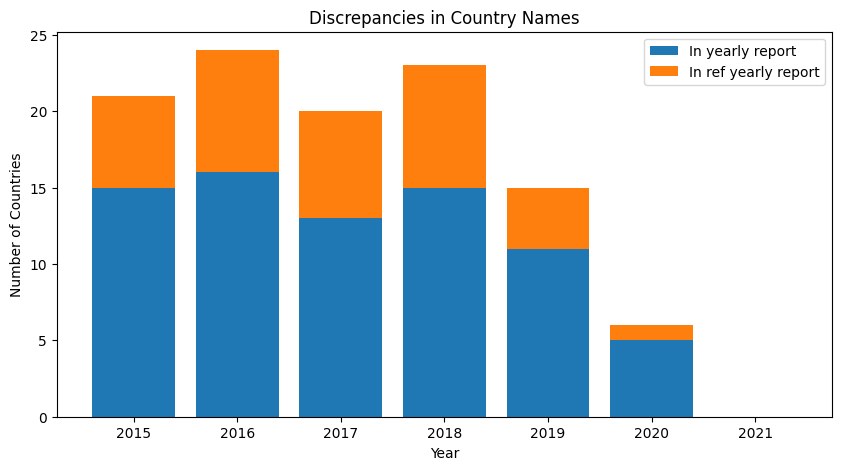

In [13]:
def plot_country_discrepancies_stacked(ref_year):
    diff1_counts = []
    diff2_counts = []
    for year in years:
        yearly_report = yearly_reports[year]
        ref_yearly_report = yearly_reports[ref_year]

        diff1 = [x for x in yearly_report["Country name"].unique() if x not in ref_yearly_report["Country name"].unique()]
        diff2 = [x for x in ref_yearly_report["Country name"].unique() if x not in yearly_report["Country name"].unique()]

        diff1_counts.append(len(diff1))
        diff2_counts.append(len(diff2))

    # Create a stacked bar chart to visualize discrepancies
    plt.figure(figsize=(10, 5))
    p1 = plt.bar(years, diff1_counts)
    p2 = plt.bar(years, diff2_counts, bottom=diff1_counts)

    plt.title("Discrepancies in Country Names")
    plt.xlabel("Year")
    plt.ylabel("Number of Countries")
    plt.legend((p1[0], p2[0]), ('In yearly report', 'In ref yearly report'))
    plt.show()

plot_country_discrepancies_stacked(ref_year)


In [14]:
# map the country names
discrepancies = {
    2015: {
        "Taiwan": "Taiwan Province of China",
        "Hong Kong": "Hong Kong S.A.R. of China",
        "Macedonia": "North Macedonia",
    },
    2016: {
        "Taiwan": "Taiwan Province of China",
        "Hong Kong": "Hong Kong S.A.R. of China",
        "Macedonia": "North Macedonia",

    },
    2017: {
        "Hong Kong S.A.R., China": "Hong Kong S.A.R. of China",
        "Macedonia": "North Macedonia",

    },
   
}
    # Add mappings for other years as needed
discrepancies[2018] = discrepancies[2015]
discrepancies[2019] = discrepancies[2015]
discrepancies[2020] = discrepancies[2015]

common_countries = set.intersection(*(set(yearly_reports[year]['Country name']) for year in yearly_reports.keys()))

# Update country names based on discrepancies
for year, mapping in discrepancies.items():
    yearly_reports[year]['Country name'] = yearly_reports[year]['Country name'].replace(mapping)

# Keep only the rows for common countries
for year in yearly_reports.keys():
    yearly_reports[year] = yearly_reports[year][yearly_reports[year]['Country name'].isin(common_countries)]

In [15]:
print_country_discrepancies(ref_year)

Year: 2015
In yearly report but not in ref yearly report: []
In ref yearly report but not in yearly report: []
------------------------------------------------------------------------------------------
Year: 2016
In yearly report but not in ref yearly report: []
In ref yearly report but not in yearly report: []
------------------------------------------------------------------------------------------
Year: 2017
In yearly report but not in ref yearly report: []
In ref yearly report but not in yearly report: []
------------------------------------------------------------------------------------------
Year: 2018
In yearly report but not in ref yearly report: []
In ref yearly report but not in yearly report: []
------------------------------------------------------------------------------------------
Year: 2019
In yearly report but not in ref yearly report: []
In ref yearly report but not in yearly report: []
---------------------------------------------------------------------------------

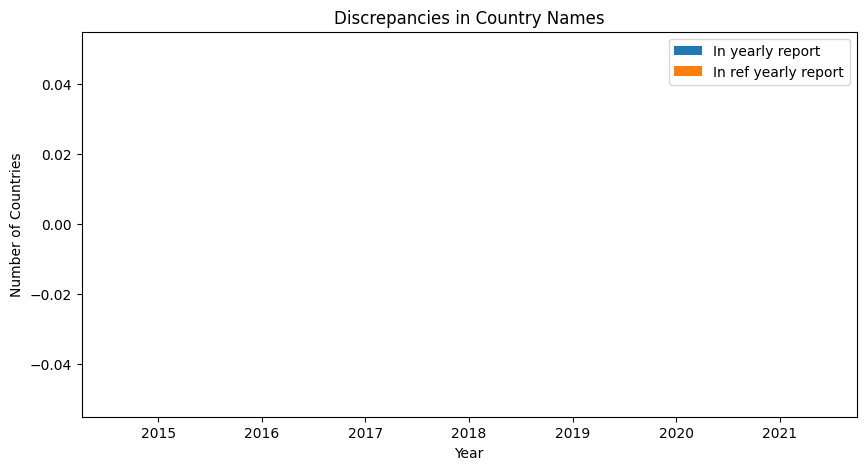

In [16]:
plot_country_discrepancies_stacked(ref_year)

In [17]:
yearly_reports[2021]

,Country name,Happiness Score,Happiness Rank,Social support,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Finland,7.842,1,0.954,10.775,72.000,0.949,0.186
1,Denmark,7.620,2,0.954,10.933,72.700,0.946,0.179
2,Switzerland,7.571,3,0.942,11.117,74.400,0.919,0.292
3,Iceland,7.554,4,0.983,10.878,73.000,0.955,0.673
4,Netherlands,7.464,5,0.942,10.932,72.400,0.913,0.338
...,...,...,...,...,...,...,...,...
143,Malawi,3.600,144,0.537,6.958,57.948,0.780,0.729
145,Botswana,3.467,146,0.784,9.782,59.269,0.824,0.801
146,Rwanda,3.415,147,0.552,7.676,61.400,0.897,0.167
147,Zimbabwe,3.145,148,0.750,7.943,56.201,0.677,0.821


In [18]:
for year in years:
    avg_score = yearly_reports[year]['Happiness Score'].mean()
    print(f"Year {year}: Average Happiness Score = {avg_score:.2f}")


Year 2015: Average Happiness Score = 5.42
Year 2016: Average Happiness Score = 5.42
Year 2017: Average Happiness Score = 75.23
Year 2018: Average Happiness Score = 5.46
Year 2019: Average Happiness Score = 5.50
Year 2020: Average Happiness Score = 5.56
Year 2021: Average Happiness Score = 5.58


In [19]:
for year, report in yearly_reports.items():
    report["Year"] = year

C:\Users\43650\AppData\Local\Temp\ipykernel_8736\2047394243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report["Year"] = year
C:\Users\43650\AppData\Local\Temp\ipykernel_8736\2047394243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report["Year"] = year


In [20]:
# yearly_reports is a dictionary of DataFrames with keys as years

# Add the year information to each dataset
for year, df in yearly_reports.items():
    df['Year'] = year

# Concatenate all DataFrames into a single DataFrame
#combined_data = pd.concat(list(yearly_reports.values()), ignore_index=True)
happiness_data = pd.concat(yearly_reports.values())
happiness_data.head(5)


C:\Users\43650\AppData\Local\Temp\ipykernel_8736\1266926771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = year


,Country name,Happiness Score,Happiness Rank,Social support,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Year
0,Switzerland,7.587,1.0,1.34951,1.39651,0.94143,0.66557,0.41978,2015
1,Iceland,7.561,2.0,1.40223,1.30232,0.94784,0.62877,0.14145,2015
2,Denmark,7.527,3.0,1.36058,1.32548,0.87464,0.64938,0.48357,2015
3,Norway,7.522,4.0,1.33095,1.45900,0.88521,0.66973,0.36503,2015
4,Canada,7.427,5.0,1.32261,1.32629,0.90563,0.63297,0.32957,2015


### Preprocessing Second Dataset

In [21]:
# Load the CO2 production data
co2_production_data = pd.read_csv("data/co2_production.csv")
# Load the HDI data
hdi_data = pd.read_csv("data/human_development_index.csv")



In [22]:
co2_production_data.head()

,ISO3,Country,hdicode,region,hdi_rank_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,...,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
0,AFG,Afghanistan,Low,SA,180.0,0.209727,0.182525,0.095233,0.084285,0.075054,...,0.327922,0.261571,0.232967,0.229680,0.190617,0.188995,0.224492,0.319299,0.312376,0.312376
1,AGO,Angola,Medium,SSA,148.0,0.429586,0.413433,0.408015,0.439647,0.286180,...,1.346212,1.277248,1.235861,1.205736,1.088803,0.953168,0.791171,0.737992,0.675410,0.675410
2,ALB,Albania,High,ECA,67.0,1.656902,1.288961,0.768727,0.724712,0.607846,...,1.601835,1.697127,1.940611,1.555329,1.556278,1.838242,1.642153,1.688178,1.575754,1.575754
3,AND,Andorra,Very High,NaN,40.0,7.461153,7.176510,6.906331,6.730577,6.488824,...,5.912019,5.896947,5.828084,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945
4,ARE,United Arab Emirates,Very High,AS,26.0,28.277672,29.256027,28.134519,30.170919,31.644558,...,22.047365,22.330116,21.914832,23.381781,22.932086,17.795688,16.011240,15.780701,15.193336,15.193336


In [23]:
hdi_data.head()

,ISO3,Country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,0.586
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,0.846,0.852,0.859,0.865,0.870,0.897,0.909,0.920,0.912,0.911


In [24]:
# filtering and dropping the years not needed
years_to_keep = [f'co2_prod_{year}' for year in range(2015, 2022)]
columns_to_keep = ['Country'] + years_to_keep
co2_data_filtered = co2_production_data.filter(columns_to_keep)

years_to_keep_hdi = [f'hdi_{year}' for year in range(2015, 2022)]
hdi_columns_to_keep = ['Country'] + years_to_keep_hdi
hdi_data_filtered = hdi_data.filter(hdi_columns_to_keep)


co2_data_filtered.sum().isna()
#hdi_data_filtered.sum().isna()

Country          False
co2_prod_2015    False
co2_prod_2016    False
co2_prod_2017    False
co2_prod_2018    False
co2_prod_2019    False
co2_prod_2020    False
co2_prod_2021    False
dtype: bool

In [25]:
hdi_data_filtered

,Country,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,Afghanistan,0.478,0.481,0.482,0.483,0.488,0.483,0.478
1,Angola,0.582,0.596,0.597,0.595,0.595,0.590,0.586
2,Albania,0.795,0.798,0.802,0.806,0.810,0.794,0.796
3,Andorra,0.867,0.871,0.868,0.872,0.873,0.848,0.858
4,United Arab Emirates,0.865,0.870,0.897,0.909,0.920,0.912,0.911
...,...,...,...,...,...,...,...,...
201,Europe and Central Asia,0.783,0.788,0.794,0.798,0.802,0.793,0.796
202,Latin America and the Caribbean,0.758,0.761,0.763,0.766,0.768,0.755,0.754
203,South Asia,0.623,0.633,0.638,0.640,0.641,0.638,0.632
204,Sub-Saharan Africa,0.534,0.539,0.542,0.547,0.552,0.549,0.547


In [26]:
co2_data_filtered

,Country,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
0,Afghanistan,0.229680,0.190617,0.188995,0.224492,0.319299,0.312376,0.312376
1,Angola,1.205736,1.088803,0.953168,0.791171,0.737992,0.675410,0.675410
2,Albania,1.555329,1.556278,1.838242,1.642153,1.688178,1.575754,1.575754
3,Andorra,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945
4,United Arab Emirates,23.381781,22.932086,17.795688,16.011240,15.780701,15.193336,15.193336
...,...,...,...,...,...,...,...,...
201,Europe and Central Asia,5.335794,5.465763,5.560856,5.608151,5.414787,5.231702,5.233625
202,Latin America and the Caribbean,3.006004,2.907513,2.825852,2.691328,2.607044,2.326692,2.324879
203,South Asia,1.742220,1.814518,1.879986,1.946198,1.959379,1.845635,1.843217
204,Sub-Saharan Africa,0.828164,0.830583,0.803148,0.799792,0.788715,0.726158,0.719480


In [27]:

co2_data_reshaped = co2_data_filtered.melt(id_vars=['Country'], 
                                           var_name='Year', 
                                           value_name='co2_prod')

# Extract the full year from the 'Year' column
co2_data_reshaped['Year'] = co2_data_reshaped['Year'].str.extract('(\d{4})').astype(int)

# Now, we have a DataFrame with the full 'Year', 'Country', and 'co2_prod'
#print(co2_data_reshaped.head())




hdi_data_reshaped = hdi_data_filtered.melt(id_vars=['Country'], 
                                           var_name='Year', 
                                           value_name='hdi_')

# Extract the full year from the 'Year' column
hdi_data_reshaped['Year'] = hdi_data_reshaped['Year'].str.extract('(\d{4})').astype(int)
print(hdi_data_reshaped.head())



                Country  Year   hdi_
0           Afghanistan  2015  0.478
1                Angola  2015  0.582
2               Albania  2015  0.795
3               Andorra  2015  0.867
4  United Arab Emirates  2015  0.865


In [28]:
co2_data_reshaped.head(5)

,Country,Year,co2_prod
0,Afghanistan,2015,0.229680
1,Angola,2015,1.205736
2,Albania,2015,1.555329
3,Andorra,2015,5.964928
4,United Arab Emirates,2015,23.381781


In [29]:
hdi_data_reshaped.head(5)

,Country,Year,hdi_
0,Afghanistan,2015,0.478
1,Angola,2015,0.582
2,Albania,2015,0.795
3,Andorra,2015,0.867
4,United Arab Emirates,2015,0.865


In [30]:
happiness_countries = set(happiness_data['Country name'])
co2_countries = set(co2_data_reshaped['Country'])

# Countries in happiness_data but not in co2_data
missing_in_co2 = happiness_countries - co2_countries

# Countries in co2_data but not in happiness_data
missing_in_happiness = co2_countries - happiness_countries

# Display discrepancies
print("Countries in happiness_data but not in co2_data:", missing_in_co2)
print("Countries in co2_data but not in happiness_data:", missing_in_happiness)


Countries in happiness_data but not in co2_data: {'Czech Republic', 'Congo (Brazzaville)', 'Vietnam', 'Iran', 'Palestinian Territories', 'Tanzania', 'South Korea', 'Ivory Coast', 'Bolivia', 'Russia', 'Turkey', 'Kosovo', 'Moldova', 'Venezuela'}
Countries in co2_data but not in happiness_data: {'Antigua and Barbuda', 'Eritrea', 'Fiji', 'Saint Lucia', 'Central African Republic', 'Micronesia (Federated States of)', 'Cabo Verde', 'Iran (Islamic Republic of)', 'Vanuatu', 'Brunei Darussalam', 'Palau', 'Hong Kong, China (SAR)', 'Comoros', 'Europe and Central Asia', 'Dominica', 'Low human development', 'Grenada', 'Korea (Republic of)', 'Saint Vincent and the Grenadines', 'Sub-Saharan Africa', 'Guyana', 'Moldova (Republic of)', 'Tuvalu', 'High human development', 'Suriname', 'Qatar', "Lao People's Democratic Republic", 'South Sudan', 'Bhutan', 'Congo', 'East Asia and the Pacific', 'Saint Kitts and Nevis', 'Sudan', 'Oman', 'Russian Federation', 'Belize', 'Viet Nam', 'Cuba', 'San Marino', 'Tonga',

In [31]:
# Mapping dictionary for country name discrepancies
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'TÃ¼rkiye': 'Turkey',
    "CÃ´te d'Ivoire": 'Ivory Coast',
    'Congo': 'Congo (Brazzaville)',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Tanzania (United Republic of)': 'Tanzania',
    'Korea (Republic of)': 'South Korea',
    'Czechia': 'Czech Republic',
    'Iran (Islamic Republic of)': 'Iran',
    'Kosovo': 'Kosovo',
    'Moldova (Republic of)': 'Moldova',
    'Palestine, State of': 'Palestinian Territories',
    'Russian Federation': 'Russia',
    'Viet Nam': 'Vietnam',
}

# Replace country names in co2_data using the mapping
co2_data_reshaped['Country'].replace(country_mapping, inplace=True)
hdi_data_reshaped['Country'].replace(country_mapping, inplace=True)

# Verify the changes
#print(co2_data['Country'].unique())



C:\Users\43650\AppData\Local\Temp\ipykernel_8736\2949645594.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  co2_data_reshaped['Country'].replace(country_mapping, inplace=True)
C:\Users\43650\AppData\Local\Temp\ipykernel_8736\2949645594.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [32]:
# Merge co2 and hdi datasets based on 'Country' and 'Year'
merged_second_data = pd.merge(co2_data_reshaped, hdi_data_reshaped, on=['Country', 'Year'], how='inner')

# Display the merged data
print(merged_second_data.head())


                Country  Year   co2_prod   hdi_
0           Afghanistan  2015   0.229680  0.478
1                Angola  2015   1.205736  0.582
2               Albania  2015   1.555329  0.795
3               Andorra  2015   5.964928  0.867
4  United Arab Emirates  2015  23.381781  0.865


In [33]:
# hdi data
happiness_countries = set(happiness_data['Country name'])
merged_countries = set(merged_second_data['Country'])

# Countries in happiness_data but not in co2_data
missing_in_merged = happiness_countries - merged_countries

# Countries in co2_data but not in happiness_data
missing_in_happiness = merged_countries - happiness_countries

# Display discrepancies
print("Countries in happiness_data but not in co2_data:", missing_in_merged)
print("Countries in co2_data but not in happiness_data:", missing_in_happiness)

Countries in happiness_data but not in co2_data: {'Kosovo'}
Countries in co2_data but not in happiness_data: {'Bahamas', 'Low human development', 'Grenada', 'Latin America and the Caribbean', 'Congo (Democratic Republic of the)', 'Mozambique', 'Saint Vincent and the Grenadines', 'Seychelles', 'Timor-Leste', 'Eswatini (Kingdom of)', 'Gambia', 'Sub-Saharan Africa', 'Equatorial Guinea', 'Angola', 'Guyana', "Korea (Democratic People's Rep. of)", 'Trinidad and Tobago', 'Tuvalu', 'High human development', 'Arab States', 'Suriname', 'Qatar', 'Antigua and Barbuda', "Lao People's Democratic Republic", 'South Sudan', 'Monaco', 'Bhutan', 'Namibia', 'Eritrea', 'Sao Tome and Principe', 'Fiji', 'Andorra', 'East Asia and the Pacific', 'Guinea-Bissau', 'Saint Kitts and Nevis', 'World', 'Saint Lucia', 'Central African Republic', 'Micronesia (Federated States of)', 'Sudan', 'Djibouti', 'Oman', 'Nauru', 'Cabo Verde', 'Somalia', 'Vanuatu', 'Brunei Darussalam', 'Papua New Guinea', 'Lesotho', 'Palau', 'Sout

In [34]:
# Drop rows where 'Country' is not in happiness_data
merged_second_data = merged_second_data[merged_second_data['Country'].isin(happiness_data['Country name'])]

# Display the updated merged data
merged_second_data.head()


,Country,Year,co2_prod,hdi_
0,Afghanistan,2015,0.229680,0.478
2,Albania,2015,1.555329,0.795
4,United Arab Emirates,2015,23.381781,0.865
5,Argentina,2015,4.466724,0.848
6,Armenia,2015,1.869493,0.766


In [35]:
happiness_data.head(10)

,Country name,Happiness Score,Happiness Rank,Social support,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Year
0,Switzerland,7.587,1.0,1.34951,1.39651,0.94143,0.66557,0.41978,2015
1,Iceland,7.561,2.0,1.40223,1.30232,0.94784,0.62877,0.14145,2015
2,Denmark,7.527,3.0,1.36058,1.32548,0.87464,0.64938,0.48357,2015
3,Norway,7.522,4.0,1.33095,1.45900,0.88521,0.66973,0.36503,2015
4,Canada,7.427,5.0,1.32261,1.32629,0.90563,0.63297,0.32957,2015
5,Finland,7.406,6.0,1.31826,1.29025,0.88911,0.64169,0.41372,2015
6,Netherlands,7.378,7.0,1.28017,1.32944,0.89284,0.61576,0.31814,2015
7,Sweden,7.364,8.0,1.28907,1.33171,0.91087,0.65980,0.43844,2015
8,New Zealand,7.286,9.0,1.31967,1.25018,0.90837,0.63938,0.42922,2015
9,Australia,7.284,10.0,1.30923,1.33358,0.93156,0.65124,0.35637,2015


In [36]:
merged_second_data.head(10)

,Country,Year,co2_prod,hdi_
0,Afghanistan,2015,0.229680,0.478
2,Albania,2015,1.555329,0.795
4,United Arab Emirates,2015,23.381781,0.865
5,Argentina,2015,4.466724,0.848
6,Armenia,2015,1.869493,0.766
8,Australia,2015,16.850700,0.933
9,Austria,2015,7.645374,0.910
10,Azerbaijan,2015,3.843893,0.748
11,Burundi,2015,0.038471,0.428
12,Belgium,2015,8.952519,0.924


In [37]:
# merging the two datasets on 'Country name','Country' and Year
final_data = happiness_data.merge(merged_second_data, how='inner', left_on=['Country name', 'Year'], right_on=['Country', 'Year'])

# Display the merged data
final_data.head()


,Country name,Happiness Score,Happiness Rank,Social support,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Year,Country,co2_prod,hdi_
0,Switzerland,7.587,1.0,1.34951,1.39651,0.94143,0.66557,0.41978,2015,Switzerland,4.668199,0.954
1,Iceland,7.561,2.0,1.40223,1.30232,0.94784,0.62877,0.14145,2015,Iceland,10.707873,0.945
2,Denmark,7.527,3.0,1.36058,1.32548,0.87464,0.64938,0.48357,2015,Denmark,6.188361,0.936
3,Norway,7.522,4.0,1.33095,1.45900,0.88521,0.66973,0.36503,2015,Norway,8.772584,0.953
4,Canada,7.427,5.0,1.32261,1.32629,0.90563,0.63297,0.32957,2015,Canada,15.906585,0.926


In [38]:
# Drop the 'Country' column
final_data.drop(columns=['Country'], inplace=True)

# Rename the 'co2_prod' column to 'CO2 Production'
final_data.rename(columns={'co2_prod': 'CO2 Production', 'hdi_': 'HDI'}, inplace=True)



In [39]:
final_data.to_csv("final_data.csv", index=False)

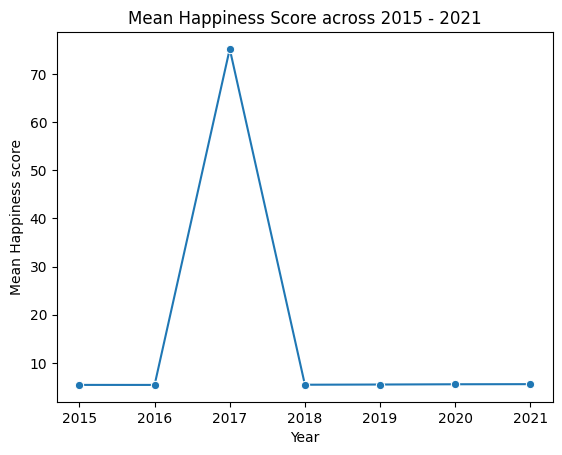

In [40]:
agg_report_grped = final_data.groupby(by="Year").mean(numeric_only=True)
ax = sns.lineplot(data=agg_report_grped, x="Year", y="Happiness Score", marker="o")
ax.set_ylabel("Mean Happiness score")
ax.set_title("Mean Happiness Score across 2015 - 2021")
plt.show()

In [41]:
# From the above visual we can see that the column names Happiness Score and Happiness Rank
# for the year 2017 are interchanged
final_data.loc[final_data['Year'] == 2017, ['Happiness Rank', 'Happiness Score']] = final_data.loc[final_data['Year'] == 2017, ['Happiness Score', 'Happiness Rank']].values


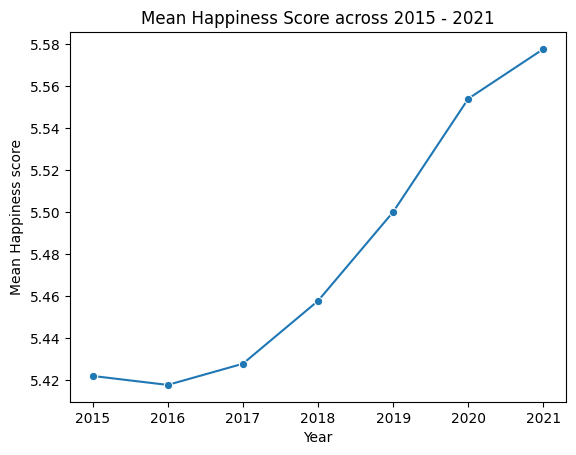

In [42]:
agg_report_grped = final_data.groupby(by="Year").mean(numeric_only=True)
ax = sns.lineplot(data=agg_report_grped, x="Year", y="Happiness Score", marker="o")
ax.set_ylabel("Mean Happiness score")
ax.set_title("Mean Happiness Score across 2015 - 2021")
plt.show()

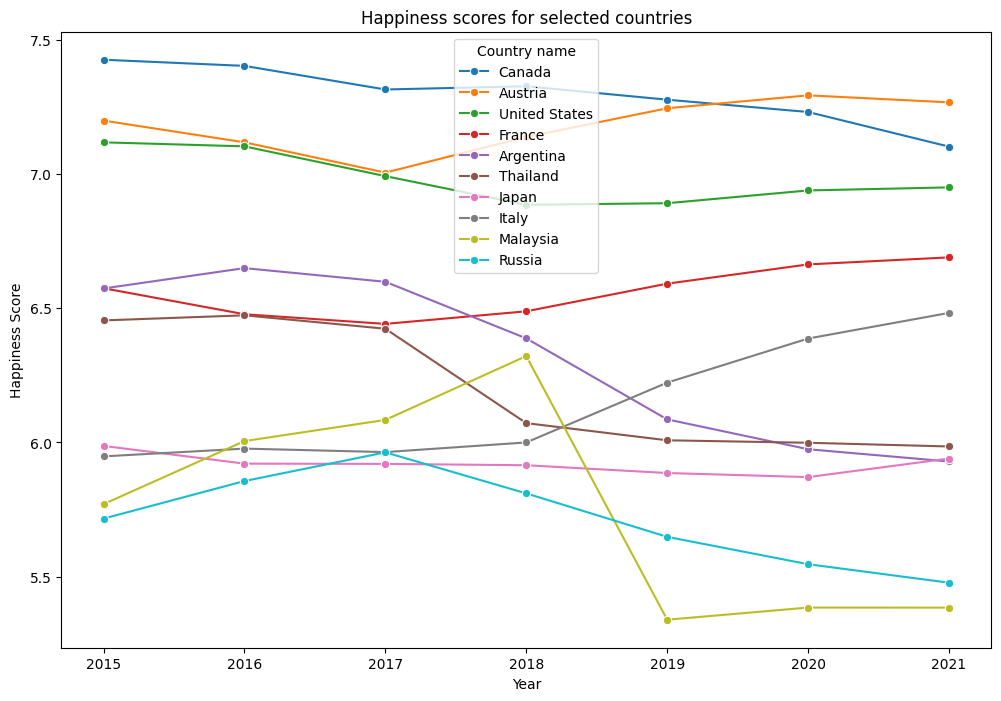

In [43]:
# plot happiness score for few countries
plt.figure(figsize=(12,8))
countries_of_interest = ["Japan", "Malaysia", "Thailand", "Austria", "United States", "Canada", "Argentina", "France", "Russia", "Italy"]

agg_report_filtered = final_data[final_data["Country name"].isin(countries_of_interest)]
ax = sns.lineplot(data=agg_report_filtered, x="Year", y="Happiness Score", hue="Country name", marker="o")
ax.set(title="Happiness scores for selected countries")
plt.show()

In [44]:
final_data.head()

,Country name,Happiness Score,Happiness Rank,Social support,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Year,CO2 Production,HDI
0,Switzerland,7.587,1.0,1.34951,1.39651,0.94143,0.66557,0.41978,2015,4.668199,0.954
1,Iceland,7.561,2.0,1.40223,1.30232,0.94784,0.62877,0.14145,2015,10.707873,0.945
2,Denmark,7.527,3.0,1.36058,1.32548,0.87464,0.64938,0.48357,2015,6.188361,0.936
3,Norway,7.522,4.0,1.33095,1.45900,0.88521,0.66973,0.36503,2015,8.772584,0.953
4,Canada,7.427,5.0,1.32261,1.32629,0.90563,0.63297,0.32957,2015,15.906585,0.926


C:\Users\43650\AppData\Local\Temp\ipykernel_8736\1745793102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Happiness Score', data=final_data, palette="Set3")


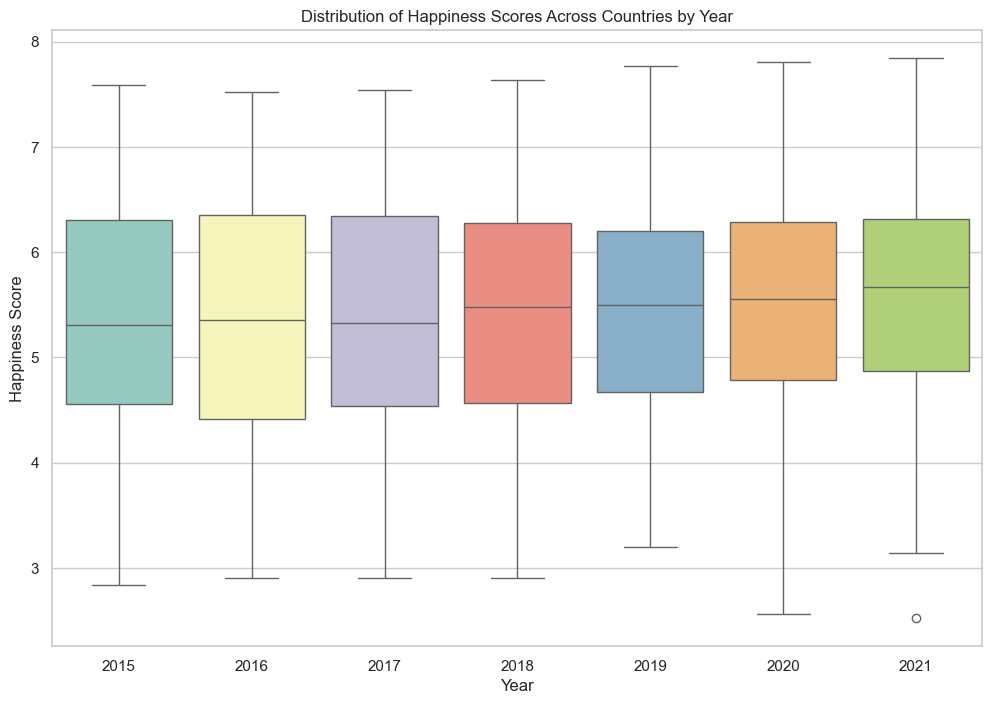

In [45]:

sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Happiness Score', data=final_data, palette="Set3")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Distribution of Happiness Scores Across Countries by Year')

# Show the plot
plt.show()


The median happiness scores have remained relatively stable over the years with 
a score of approximately 5.5. 
However, there are variations in the spread of scores each year, 
with some years having wider interquartile ranges. 
This indicates more variability in reported happiness levels from 2015 to 2021.

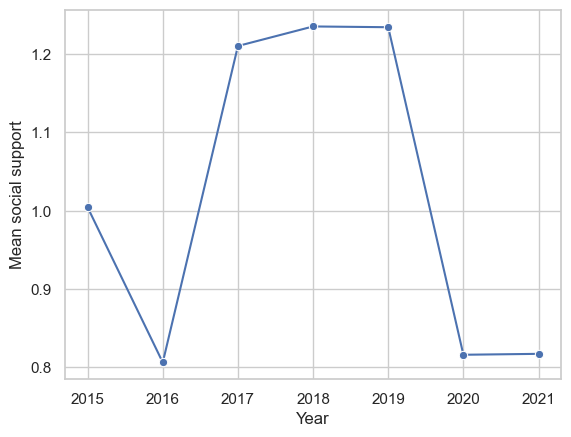

In [46]:
agg_report_grped = final_data.groupby(by="Year").mean(numeric_only=True)
ax = sns.lineplot(data=agg_report_grped, x="Year", y="Social support", marker="o")
ax.set_ylabel("Mean social support")
plt.show()


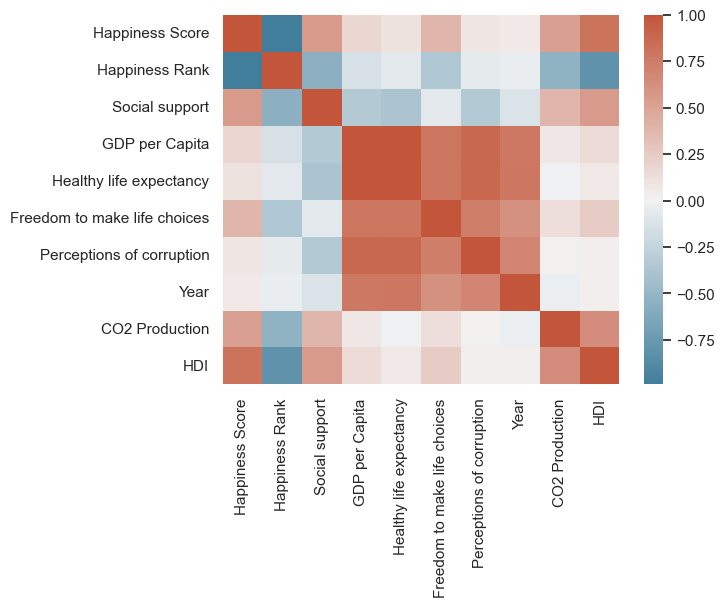

In [47]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#sns.heatmap(cor,annot=True,cmap=cmap ,fmt=".2f", linewidths=.5)
sns.heatmap(final_data.corr(numeric_only=True), cmap=cmap, fmt=".2f")
plt.show()

### Model

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load and Inspect the Data
print(final_data.info())  # Inspect the dataset for missing values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  952 non-null    object 
 1   Happiness Score               952 non-null    float64
 2   Happiness Rank                952 non-null    float64
 3   Social support                952 non-null    float64
 4   GDP per Capita                952 non-null    float64
 5   Healthy life expectancy       952 non-null    float64
 6   Freedom to make life choices  952 non-null    float64
 7   Perceptions of corruption     951 non-null    float64
 8   Year                          952 non-null    int64  
 9   CO2 Production                952 non-null    float64
 10  HDI                           952 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 81.9+ KB
None


In [50]:
print(final_data.describe())  # Get summary statistics

       Happiness Score  Happiness Rank  Social support  GDP per Capita  \
count       952.000000      952.000000      952.000000      952.000000   
mean          5.479487       75.448529        1.017648        3.357257   
std           1.117988       44.772676        0.306972        3.893737   
min           2.523000        1.000000        0.000000        0.015300   
25%           4.633300       37.000000        0.813000        0.815042   
50%           5.485500       74.000000        0.952243        1.184020   
75%           6.300500      114.000000        1.260077        7.779262   
max           7.842000      158.000000        1.644000       11.647000   

       Healthy life expectancy  Freedom to make life choices  \
count               952.000000                    952.000000   
mean                 19.071487                      0.523483   
std                  29.374790                      0.218955   
min                   0.000000                      0.000000   
25%          

In [51]:
# Handle Missing Data
# Drop rows with missing values
final_data_cleaned = final_data.dropna()

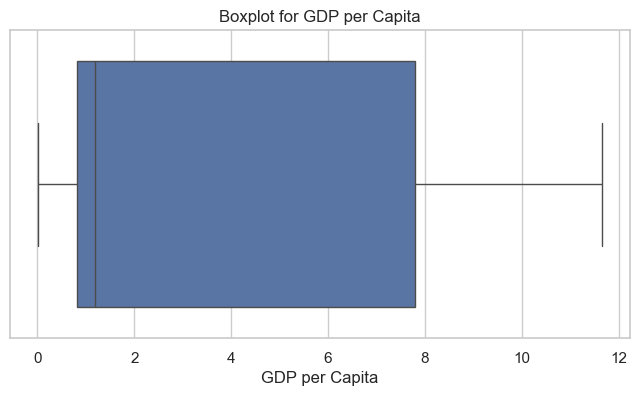

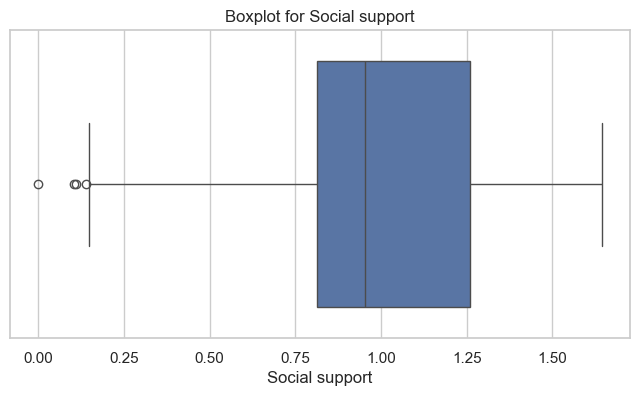

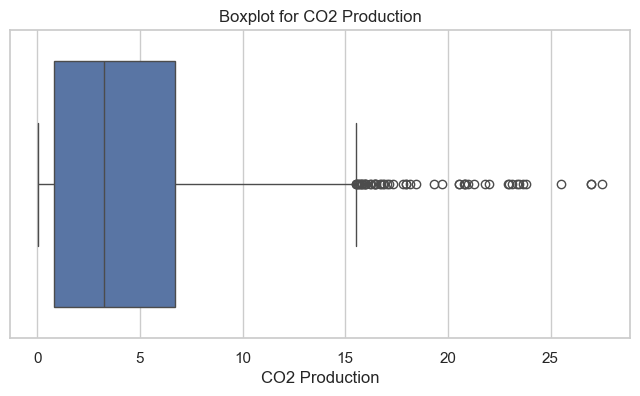

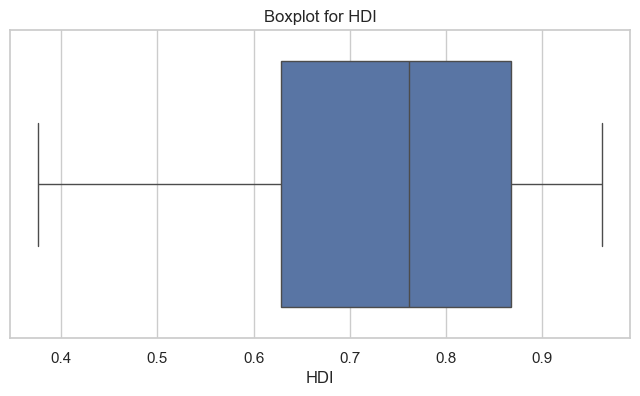

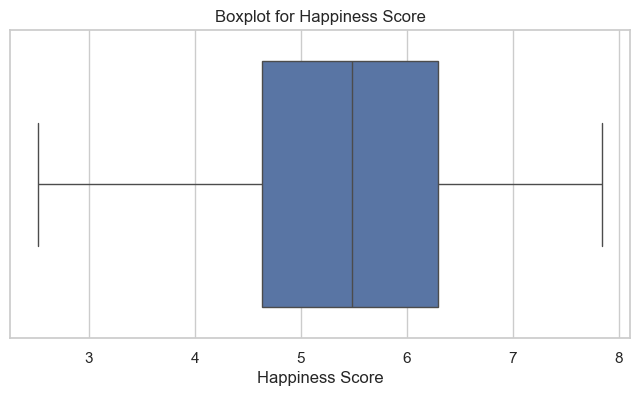

In [52]:
# Check for Outliers
# Visualize potential outliers for each numerical feature
numerical_features = ['GDP per Capita', 'Social support', 'CO2 Production', 'HDI', 'Happiness Score']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=final_data_cleaned[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()

In [53]:
# Feature Scaling
X = final_data_cleaned[['GDP per Capita', 'Social support', 'CO2 Production', 'HDI']]  # Features
y = final_data_cleaned['Happiness Score']  # Target

In [54]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LinearRegression

In [56]:
# Train and Evaluate Models
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [57]:
# Predict
y_pred_lr = lr.predict(X_test_scaled)

In [58]:
# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression Performance:\nMAE: {mae_lr:.2f}\nRMSE: {rmse_lr:.2f}\nR²: {r2_lr:.2f}")

Linear Regression Performance:
MAE: 0.51
RMSE: 0.62
R²: 0.64


## Random Forest

In [59]:
# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)  # Random Forest handles scaling internally

RandomForestRegressor(random_state=42)

In [60]:
# Predict
y_pred_rf = rf.predict(X_test)

In [61]:
# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Performance:\nMAE: {mae_rf:.2f}\nRMSE: {rmse_rf:.2f}\nR²: {r2_rf:.2f}")

Random Forest Performance:
MAE: 0.33
RMSE: 0.43
R²: 0.83


In [62]:
# Comparison of Models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf]
})
print("\nModel Comparison:")
print(model_comparison)


Model Comparison:
               Model       MAE      RMSE       R²
0  Linear Regression  0.508857  0.619633  0.63733
1      Random Forest  0.328463  0.427699  0.82721


C:\Users\43650\AppData\Local\Temp\ipykernel_8736\23774401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=model_comparison, palette='viridis')
C:\Users\43650\AppData\Local\Temp\ipykernel_8736\23774401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=model_comparison, palette='viridis')
C:\Users\43650\AppData\Local\Temp\ipykernel_8736\23774401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=model_comparison, palette='viridis')


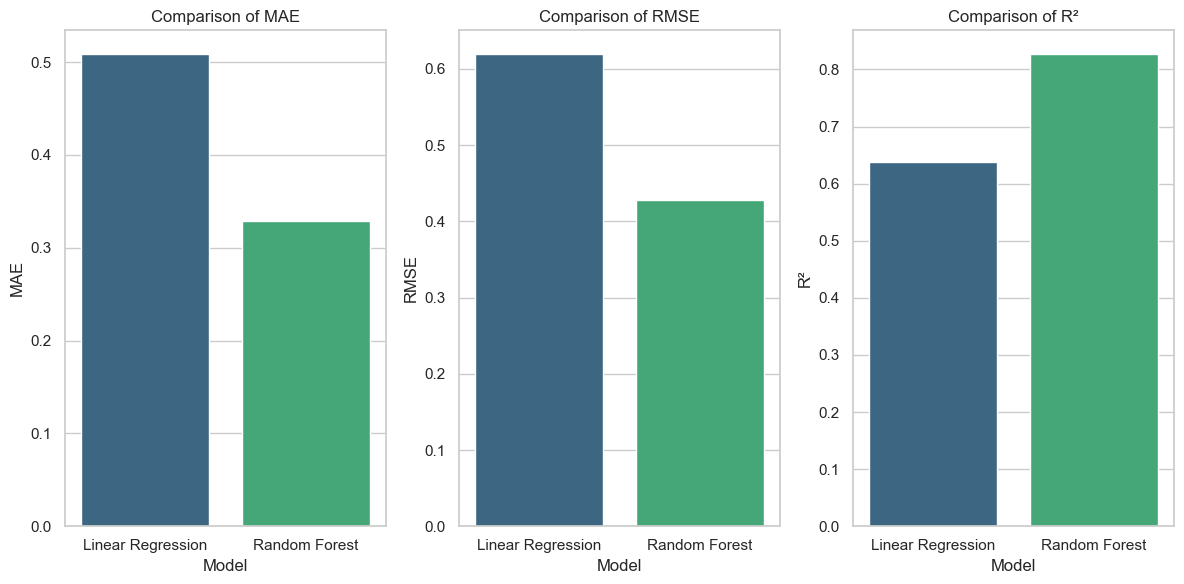

In [63]:
# Visualization: Bar Plot for Performance Metrics
plt.figure(figsize=(12, 6))
metrics = ['MAE', 'RMSE', 'R²']
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='Model', y=metric, data=model_comparison, palette='viridis')
    plt.title(f'Comparison of {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')

plt.tight_layout()
plt.show()

## Feature Importance

In [64]:
# Calculate feature importances
feature_importances = rf.feature_importances_

In [65]:
# Create a DataFrame for better visualization
feature_names = X.columns  # Assuming X contains the feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

C:\Users\43650\AppData\Local\Temp\ipykernel_8736\2815936922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


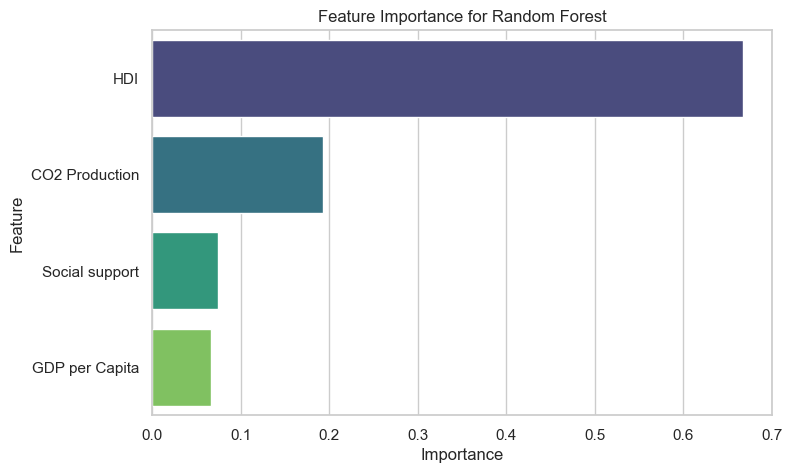

In [66]:
# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()